# **Milestone 1**

## **Context**
 - Why is this problem important to solve?

### **The objectives:**

 - What is the intended goal?

###**The key questions:**

- What are the key questions that need to be answered?



###**The problem formulation**:

- What is it that we are trying to solve using data science?

## **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM.

**Fuel_Type** : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car. (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC.

**Power** : The maximum power of the engine in bhp.

**Seats** : The number of seats in the car.

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook will give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they wish to explore different techniques. 

# **Milestone 1** 

### **Loading libraries**

In [1]:
#Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

### **Let us load the data**

In [2]:
data = pd.read_csv("used_cars.csv")

### **Understand the data by observing a few rows**

In [3]:
# View first 5 rows
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [4]:
# View last 5 rows Hint: Use tail() method
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


#### **Observations and Insights: _____**
- There are some missing data. We should find/explore them and decide how to treat those missing data.
- We should check to make sure Sr.No is unique and probably removed for analysis since it is unique and does not affect the model outcome.
- We probably have to divide the Name column into two different columns since it includes two different set of information.
- There are some numeric and some are objects. Some can be analized based on categorical data, some as numerical. We should explore this more.
- The dataset is probably sorted by their Serial Numbers.


### **Let us check the data types and and missing values of each column** 

In [5]:
# Check the datatypes of each column. Hint: Use info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [6]:
# Check total number of missing values of each column. Hint: Use isnull() method
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

#### **Observations and Insights: _____** 
- There are 7253 Serial Numbers (meaning cars).
- There are total 14 columns
- We do not have empty value in SN, Name, Location, Year, Km driven, Fuel Type, Transmission, and Owner_Type
- There are emty values in (2), Engine(46), Power(175), Seats(53), New_Price(6247), and Price (1234)
- We have 6 Float columns and 2 integers, and 5 objects
- Seats has only 53 missing values, therefore, number of seats can be one of key features in our prediction.

We can observe that `S.No.` has no null values. Also the number of unique values are equal to the number of observations. So, `S.No.` looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence it can be dropped.

In [7]:
# Remove S.No. column from data. Hint: Use inplace = True
data.drop(columns = ["S.No."], inplace = True)
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [8]:
#Here, we would like to add another feature, "Age" based on the year of the car built
#data['Current_year']=2021
#data['Ageofcar']=data['Current_year']-data['Year']
#data.drop('Current_year',axis=1,inplace=True)
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


## **Exploratory Data Analysis**

### **Let us now explore the summary statistics of numerical variables**

In [9]:
# Explore basic summary statistics of numeric variables. Hint: Use describe() method.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
Seats,7200.0,5.280417,0.809277,2.00,5.000,5.00,5.0000,10.00
New_price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_price          1006 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 736.8+ KB


#### **Observations and Insights: _____**
- The cars were nuilt between 1996 and 2019. Age of cars 2 year old to 25 years old
- 75% of the cars were built upto 2016, 50% were built upto 2014 and 25% were built upto 2014
- The average km driven is ~58K, where minimum is 171 and max is 6.5 mil which possibly is a wrong value and later on we need to treat this )we can probably remo eit from our analysis)
- 75% of tje cars were driven upto 73K
- The Mileage average is ~18 where min is 0 and max is 33.54 and 75% of the data are upto 21. Mileage cannot be 0. We have to check that later and remove if needed.
- The engine Averahe is ~1616 and min is 72 and max is 5998 and 75% falls upto 1968
- Power average is 112, min is 34.20and maz is 616 wjere 75% of the data has upto 138 power
- Min seat is 2, max is 10 and 75% of the data has uptp 5 seats 
- New price min is 3.91 and max is 375 where 75% of the cars has a price of upto 26, and the average is 22.7
- Min price is 0.44 and max is 160, where average is 9.4 and 75% of the cars are uptp 9.95.

### **Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [11]:
# Explore basic summary statistics of categorical variables. Hint: Use the argument include=['object'] 
data.describe(include='object')

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,7253,7253,7253,7253,7253
unique,2041,11,5,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,55,949,3852,5204,5952


**Number of unique observations in each category**

In [12]:
cat_cols=data.select_dtypes(include=['object']).columns

for column in cat_cols:
    print("For column:",column)
    print(data[column].value_counts())
    print('-'*50)

For column: Name
Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64
--------------------------------------------------
For column: Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
--------------------------------------------------
For column: Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Typ

#### **Observations and Insights: _____**
- Thid is only number of unique values, we can also add (normalize = True) to the code to check the percentage of the values which makes more sense, but since the question did not ask this, I have not included that part.
- in the columns Name, we see that some names have been in the data for one time and some are more than one time.
- In the column location we can see that Mumbai has a very high number 949 cars and descending where Ahmedabad has 275.
- Fuel type is mostly Diesle with 3852 and petrol with 3325 and only 2 electric cars. CNG and LPG are also very small.
- transmission is more manual 5204 and only 2049 automatic.
- Owner type is mostly Fiesr 5952 and second is 4452, third is 137 and fourth and above is only 12
- The count of all these objects/features are 7253.
- There are 204 unique car names, 11 locations, 5 Fuel Types, 2 Transmission and 4 Owner Types.
- The top Name is Mahindra XUV500 W8 2WD, and the top location is Mumbai, the top Fuel type is Diesel, and the top transmission is Manualand the top pwner type is First.
- The abovementione dtops has a frequency of 55 for the top name, 949 for the top location, 3853 for the top Fuel Type, 5204 for the top Tranmission, 5952 for thr top Owner Type.

**Think About It**: 

- We could observe from summary statistics that kilometers_driven has extreme values. Can we look at the manufactured year for cars with extreme values for kilometers_driven? 
- Also, we could observe the feature mileage has values zero. Can the mileage of a car be zero?

**Let's explore the two points mentioned above**

**Check Kilometers_Driven extreme values**

In [13]:
#Sort the dataset in 'descending' order using the feature 'Kilometers_Driven'
data.sort_values('Kilometers_Driven', ascending=False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


#### **Observations and Insights: _____**


In the first row, a car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and so we can remove this value/entry from data.

In [14]:
# Removing the 'row' at index 2328 from the data. Hint: use the argument inplace=True
data.drop([2328], axis=0,inplace=True )

**Check Mileage extreme values**

In [15]:
#Sort the dataset in 'ascending' order using the feature 'Mileage'
data.sort_values('Mileage', ascending=True).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


#### **Observations**
* Mileage of cars can not be 0, so we should treat 0's as missing values. We will do it in the Feature Engineering part

In [16]:
data.query("Mileage  == 0")['Mileage'].count()

81

In [17]:
# We have to change these 0 values to Null Value so we can treat them later:
data.loc[data["Mileage"]==0.0,'Mileage']=np.nan

In [18]:
data.query("Seats == 0")['Seats']

Series([], Name: Seats, dtype: float64)

In [19]:
# We can check the same for other features as well, starting with Power:
data.query("Power  == 0")['Power'].count()

0

In [20]:
#check 0 value for Engine:
data.query("Engine  == 0")['Engine'].count()

0

In [21]:
#And for Seats:
data.query("Seats  == 0")['Seats'].count()

0

In [95]:
data[data['Year'].str.isnumeric()]

AttributeError: Can only use .str accessor with string values!

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyse the numerical columns.

In [22]:
# Let us write a function that will help us create a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Let us plot histogram and box-plot for the feature 'Kilometers_Driven' to understand the distribution and outliers, if any.

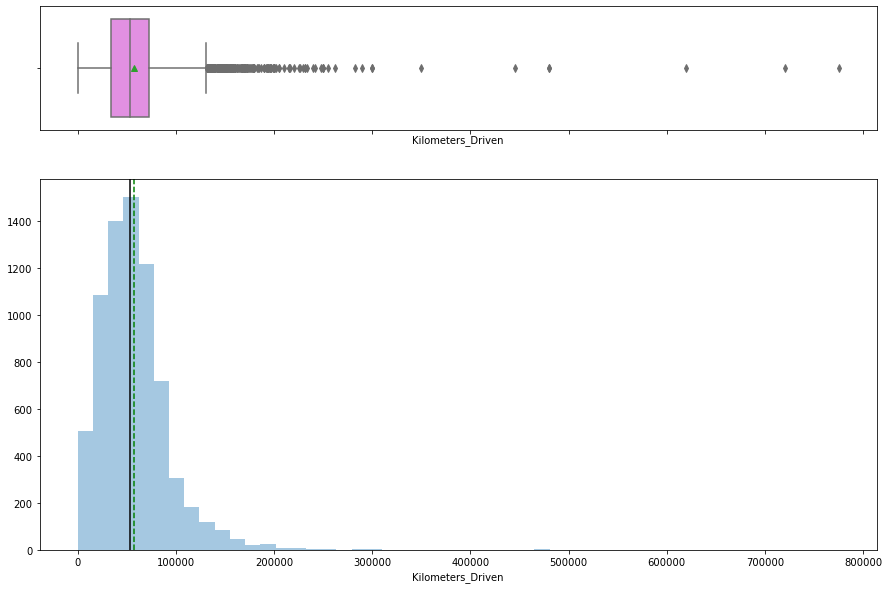

In [23]:
#Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(data['Kilometers_Driven'])

**Think About It**: Kilometers_Driven is highly right-skewed. Can we use Log transformation of the feature to reduce/remove the skewness? Why can't we keep skewed data?

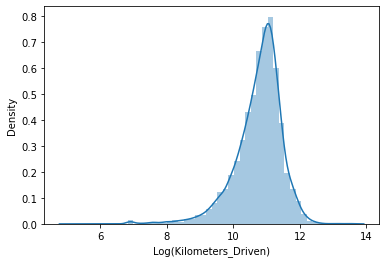

In [24]:
#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel="Log(Kilometers_Driven)");

#### **Observations and Insights: _____**
- When we did a log transformation, the distibition is getting closer to normal distribution with a lower skewness. Therefore, this tells us if we want to do linear regression later on, we have this one already checked.
- Also from the box plot, we can see that there are quite a lot of outliers.

In [25]:
### We can add a transformed kilometers_driven feature in data
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])

**Note:** Like Kilometers_Driven, the distribution of Price is also highly skewed, we can use log transformation on this column to see if that helps normalize the distribution. And add the transformed variable into the dataset. You can name the variable as **'price_log'**

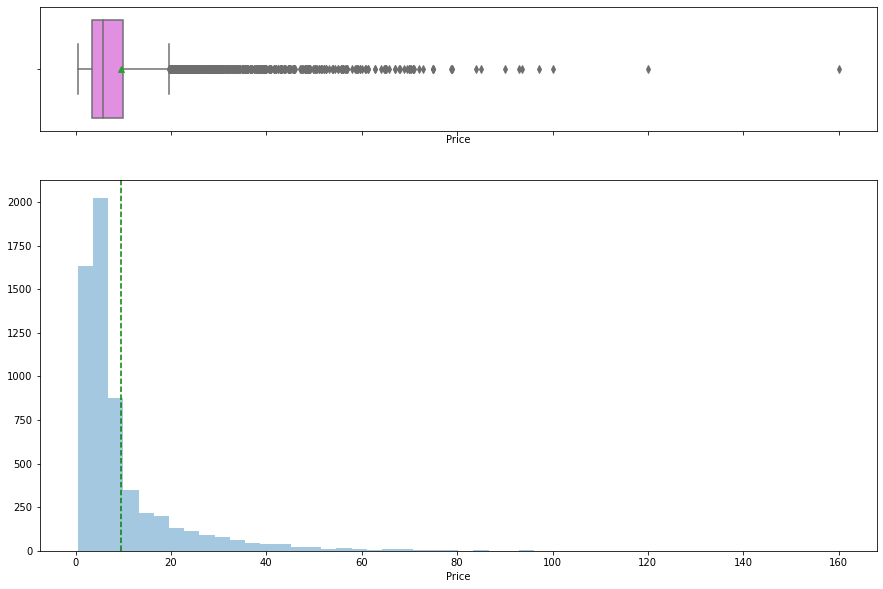

In [26]:
# Plot histogram and box-plot for 'Price'
histogram_boxplot(data['Price'])

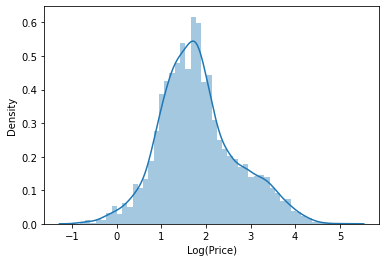

In [27]:
# Log transformation of the feature 'Price'
sns.distplot(np.log(data["Price"]), axlabel="Log(Price)");

In [28]:
# We can Add a transformed Price feature in data
data["price_log"] = np.log(data["Price"])

#### **Note:** Try plotting histogram and box-plot for different numerical features and understand how the data looks like.

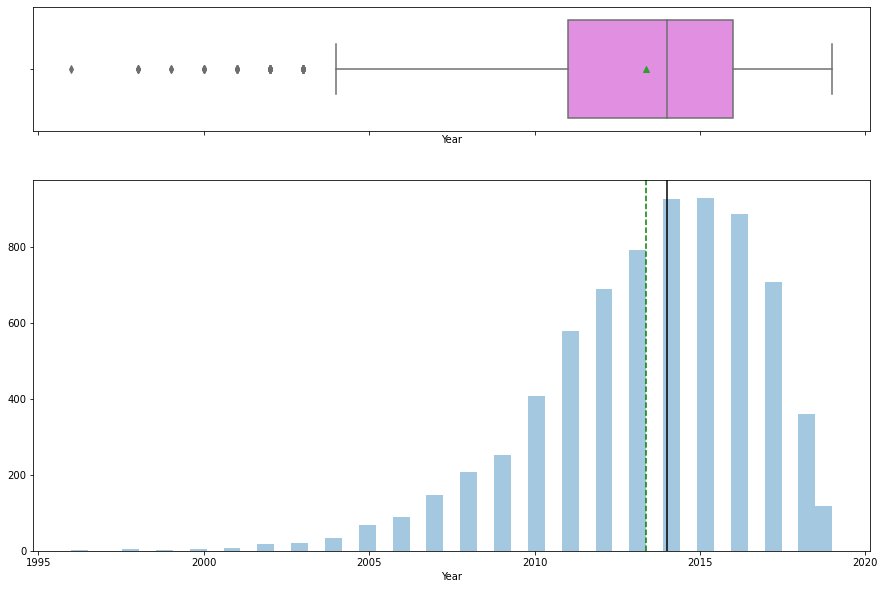

In [29]:
histogram_boxplot(data['Year'])

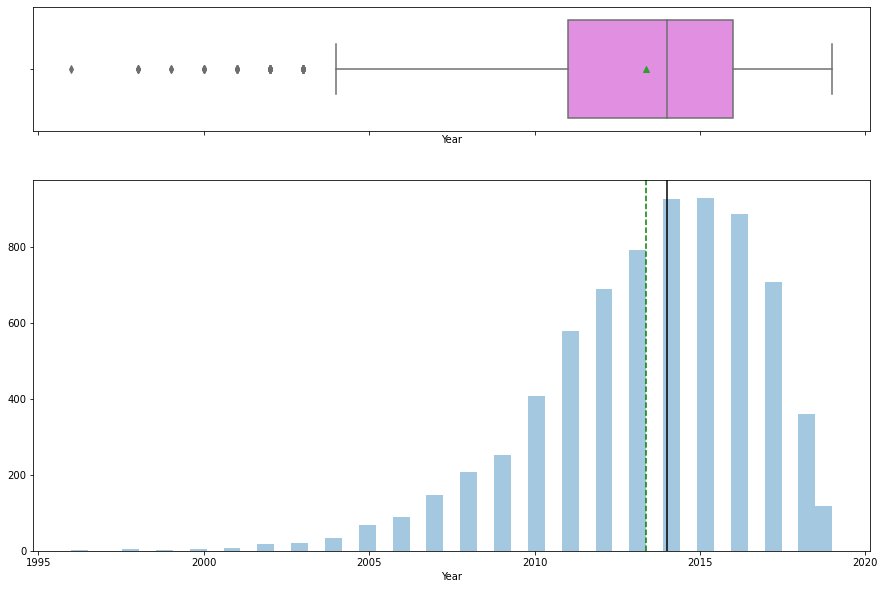

In [30]:
histogram_boxplot(data['Year'])

#### **Observations and Insights for all the plots: _____**
- Seat, Year and engine, can be treated as categorical data, not numerical since they have specific values only
- Power also needs a log transformation.
- Mileage seems to have a relatively normal distribution.
- New Price is right skewed as well.
- Engine is right skewed and has outliers on higher side.
- Power is also right skewed and high outliers.
- Price is also right skewed and has a lot of high outliers.

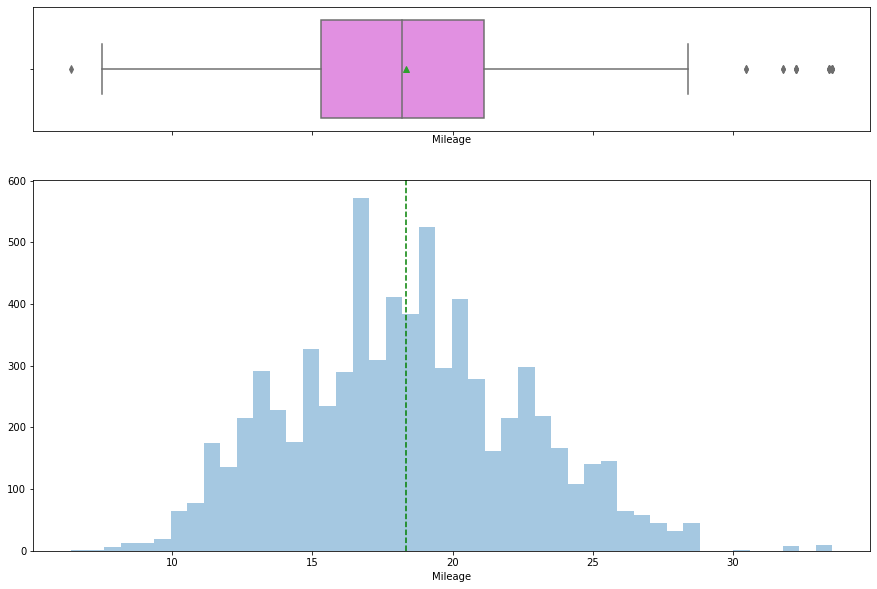

In [31]:
histogram_boxplot(data['Mileage'])

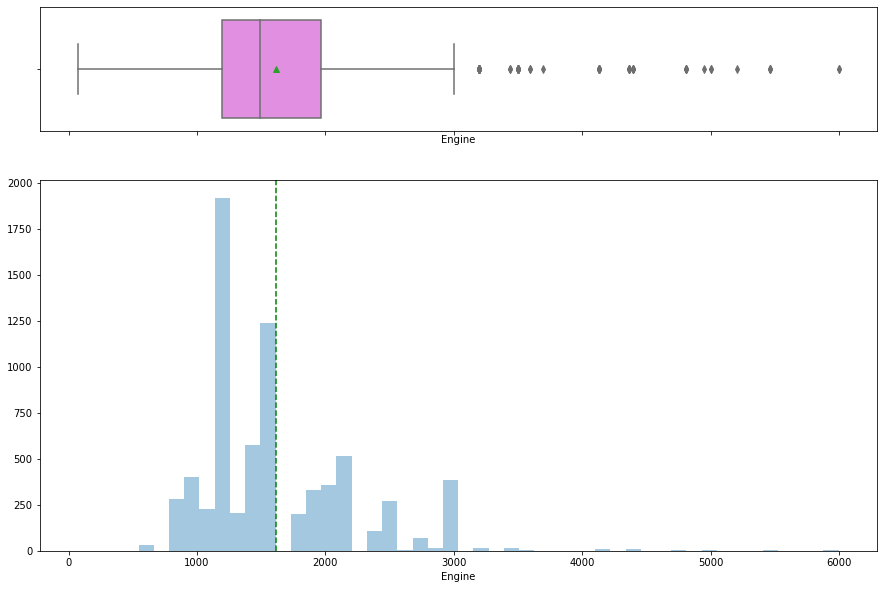

In [32]:
histogram_boxplot(data['Engine'])

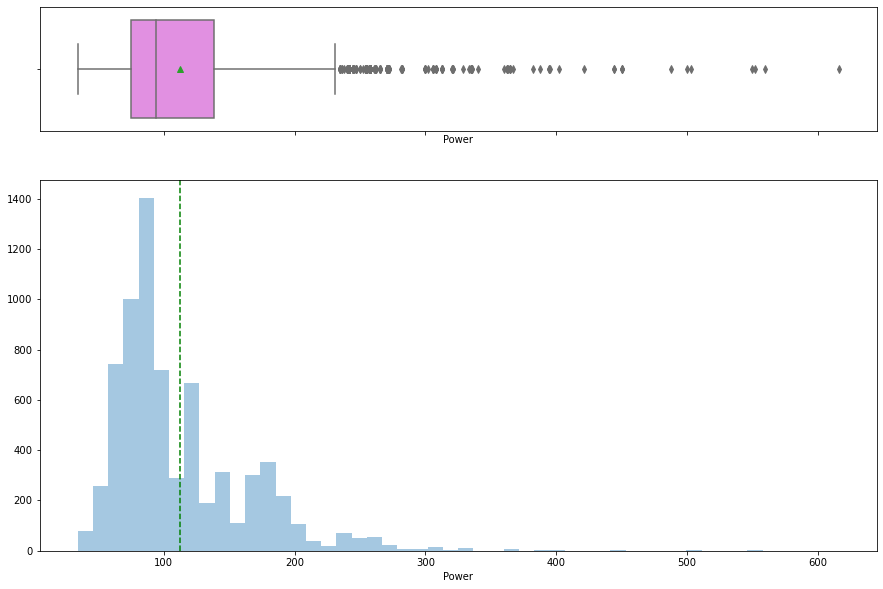

In [33]:
histogram_boxplot(data['Power'])

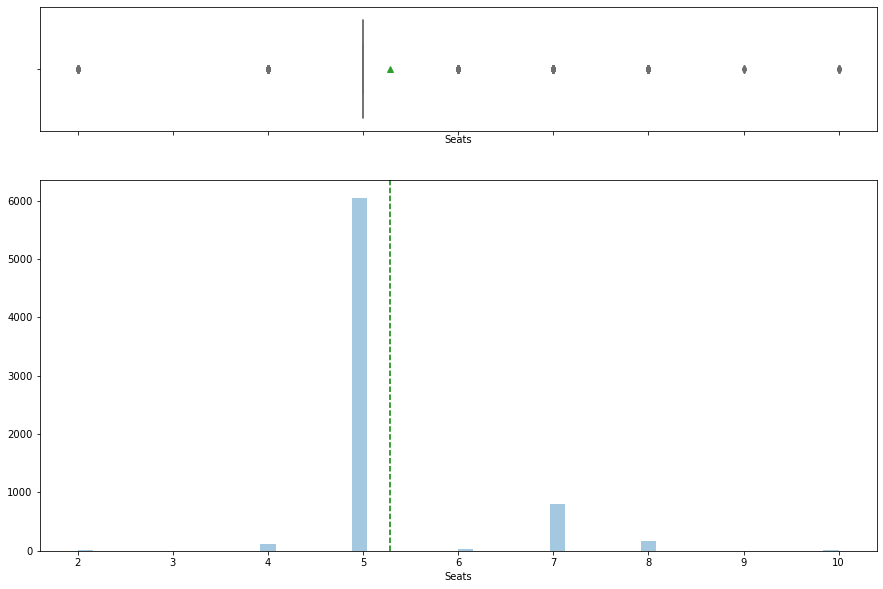

In [34]:
histogram_boxplot(data['Seats'])

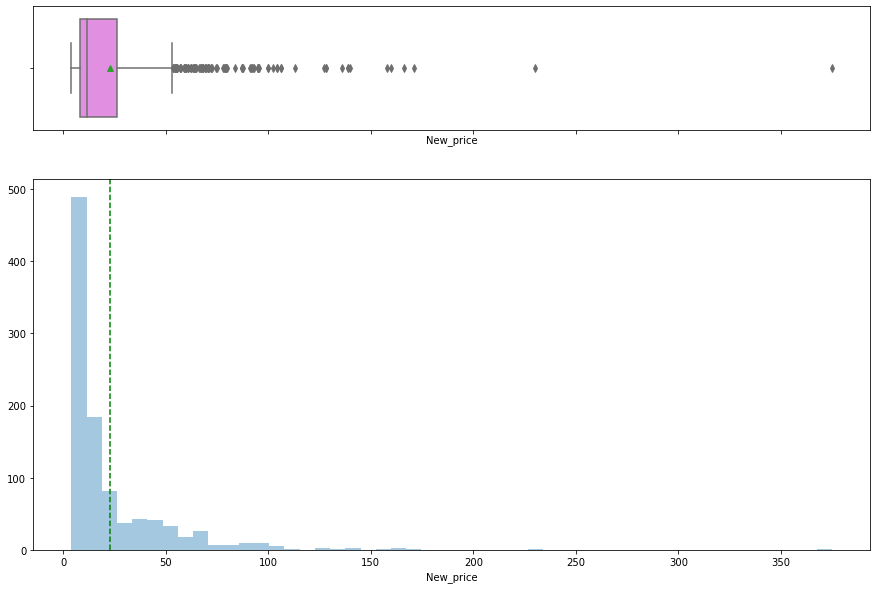

In [35]:
histogram_boxplot(data['New_price'])

## **2. Univariate analysis - Categorical Data**

In [36]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired',order = data[z].value_counts().index)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    
    plt.show() # show the plot

#### Let us plot barplot for the variable location. It will be helpful to know the number of percentage of cars from each city.

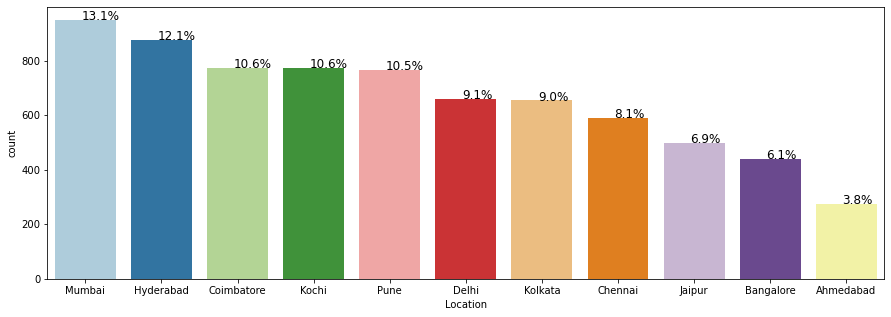

In [37]:
#Bar Plot for 'Location'
perc_on_bar('Location')

#### **Note:** Explore for other variables like Year, Fuel_Type, Transmission, Owner_Type`

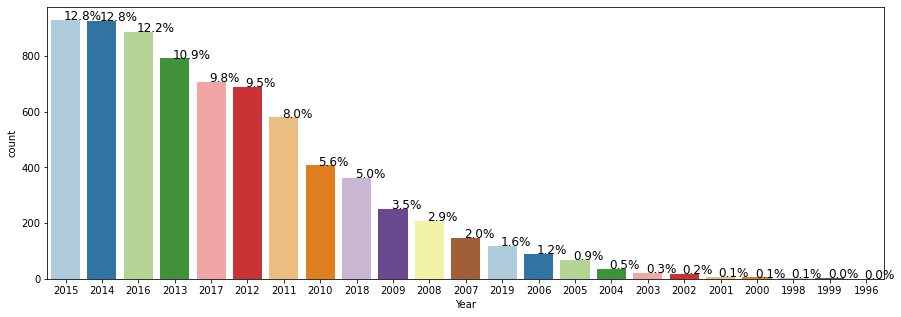

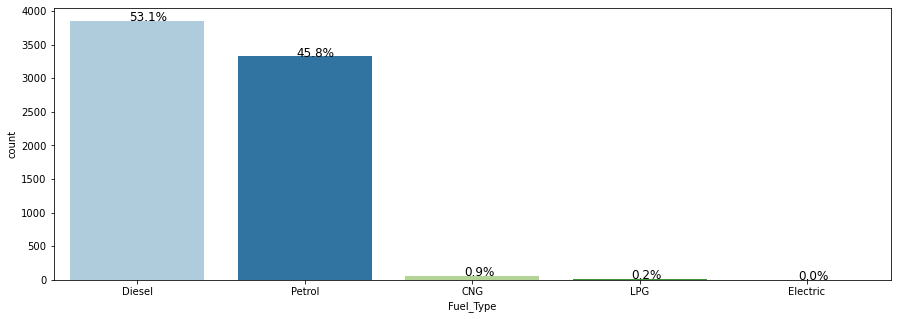

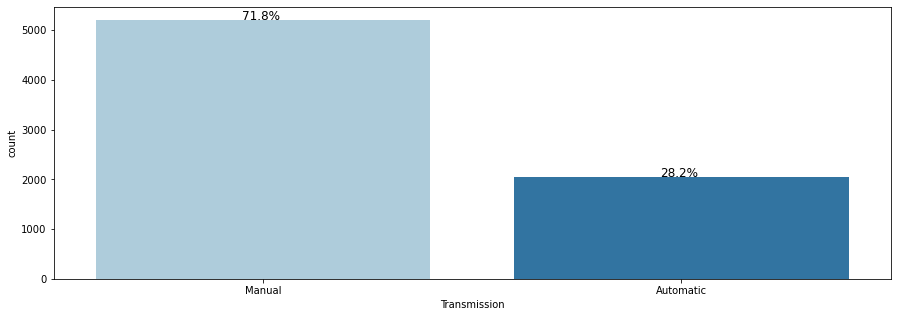

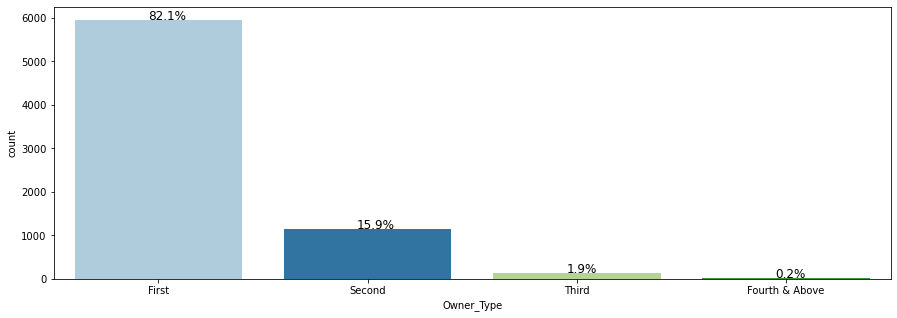

In [38]:
perc_on_bar('Year')
perc_on_bar('Fuel_Type')
perc_on_bar('Transmission')
perc_on_bar('Owner_Type')

#### **Observations and Insights from all plots: _____**
- This helps us understand univariate and percentage in each category
- Owner Type: This shows that First owners include majarity of the data 82% following second with 15.9% and third and fourth and above are very small percentages.
- Transmission: It is either Manual or Automatic and 71.8% are Manual.
- Fuel Type are 5 types, Diesl(53.1%) with higher percentage along with Petrol (45.8%), CNG (0.9%), LPG(0.2%), and very small Electric (smaller than 0.0% (Which we saw earlier only 2 of the cars were electric) 
- Year: This is almost linear (ALMOST). Except year 2019 and 2018 and 2017, and 2016, the rest of the data is linear and as the year increases, the number of the cars increases as well. The highest number of cars are for 2014 and 2015, and very few from 2000 and less than year 2000 which makes sense because those cars are obsolete now an dprobably cannot be found anymore.

## **Bivariate Analysis**

### **1. Scatter plot**
A scatter plot allows us to see relationships between two variables. 

**Note: Use log transformed values 'kilometers_driven_log' and 'price_log'**

<AxesSubplot:xlabel='price_log'>

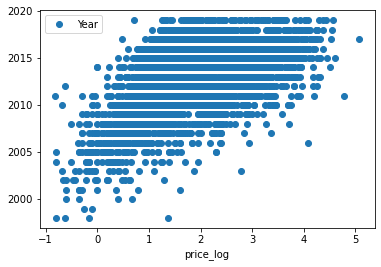

In [39]:
#Let us plot pair plot for the variables 'year' and 'price_log'
data.plot(x='price_log', y='Year', style='o')

<b>Note:</b> Try to explore different combinations of independent variables and dependent variable. Understand the relationship between all variables.

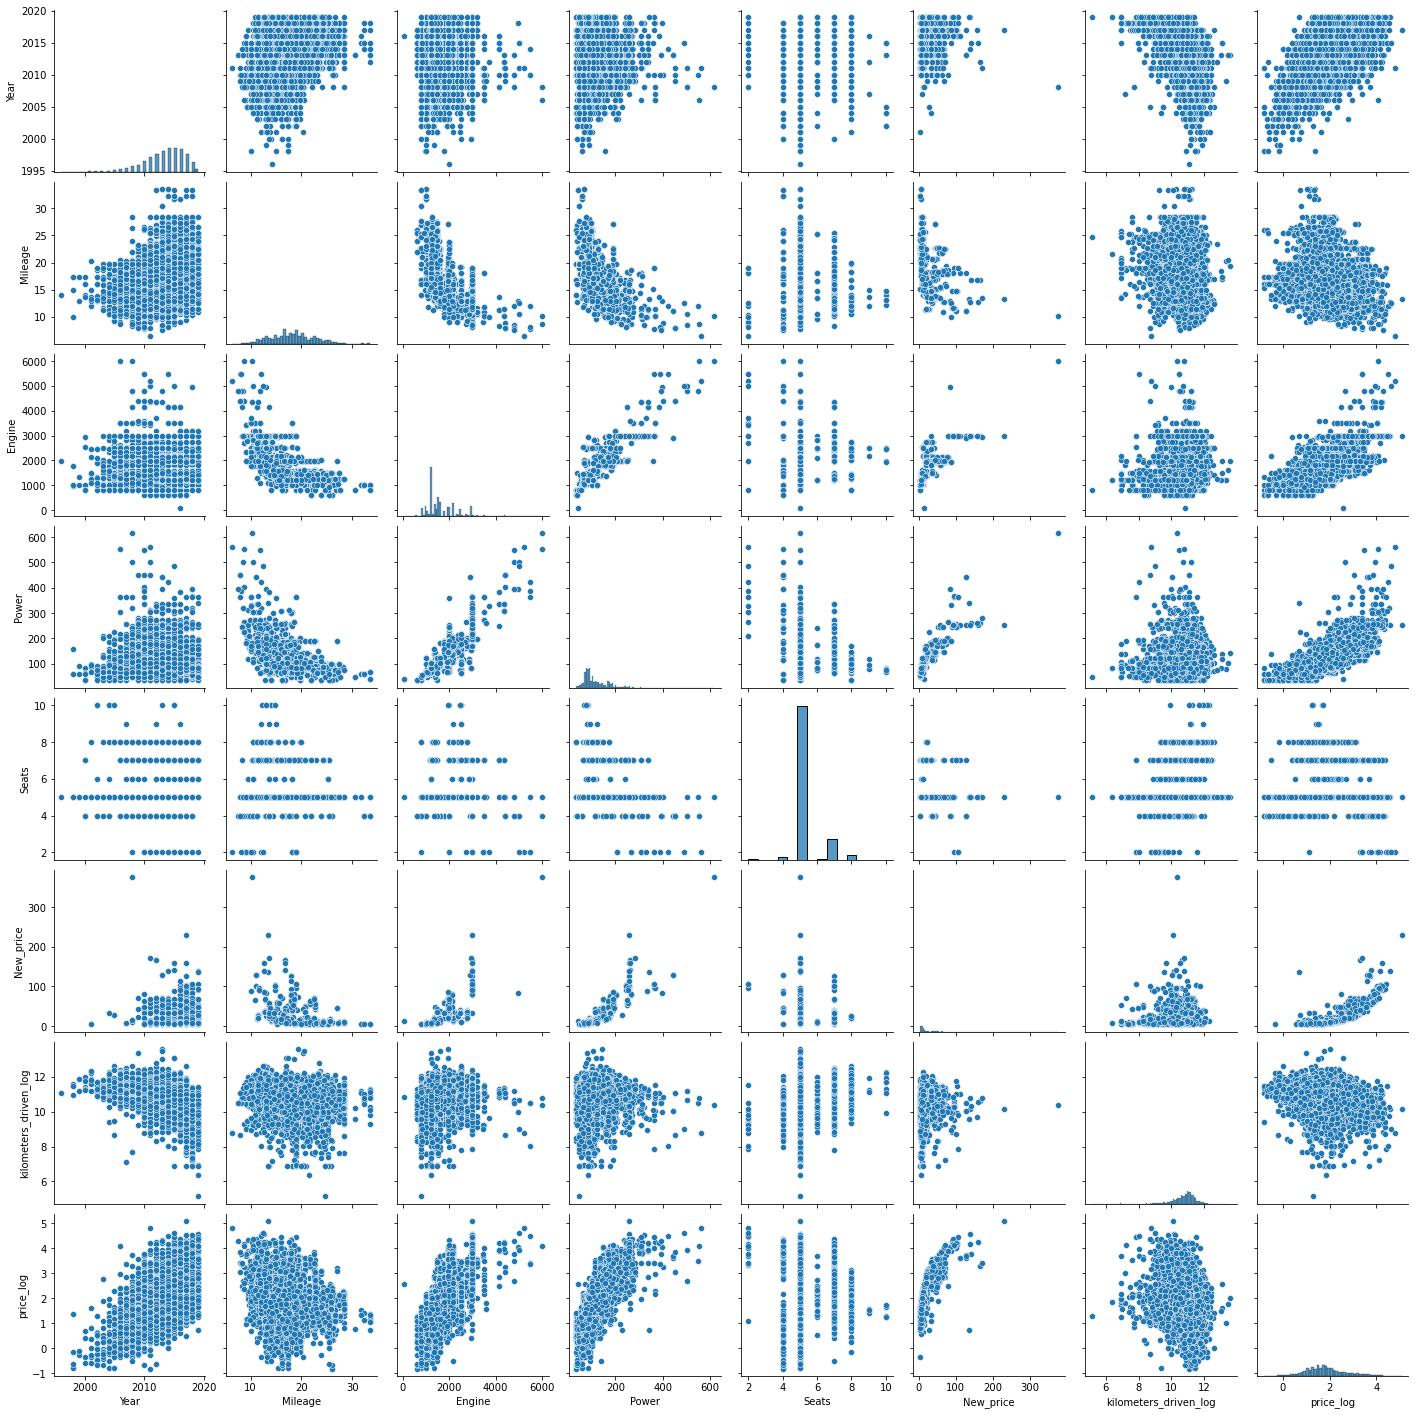

In [40]:
sns.pairplot(data.drop(['Price','Kilometers_Driven'],axis=1))


#### **Observations and Insights from all plots: _____**
- Some plots shpw that the data is completely random and there is no relationship between the two festured.  like engine and year, Mileage and km driven, Mileage and year, etc.
- Some plots show that there is no good relationship between some features. But we can see a pattern that, as one goes up, the other goes down or up. like power and mileage, etc.
- Some plots show positive correlation between them and good predictive power to predict the sale such as power and price log, or power and engine, or engine and price log, year and price log, etc.

### **2. Heat map**
Heat map shows a 2D correlation matrix between two discrete features

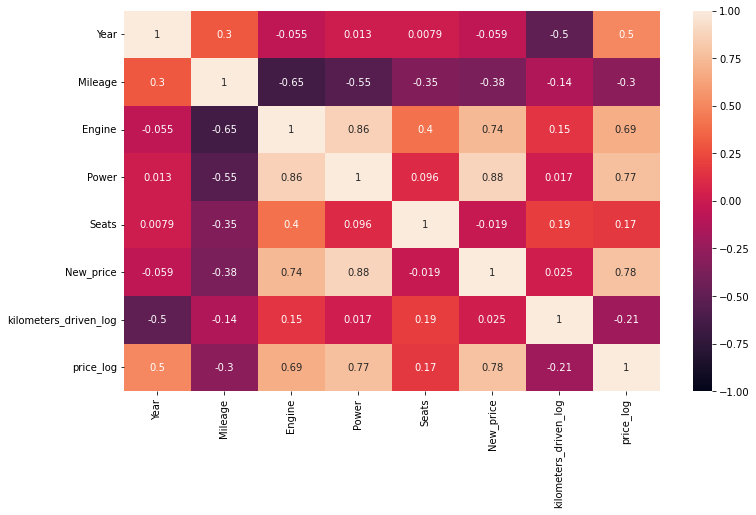

In [41]:
#We can include the log transformation values and drop the original skewed data columns
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['Price','Kilometers_Driven'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

**Observations and Insights: _____**
**These are the highest correlations between the features:**
- Over 80%: Power-New_Price, Power-Engine
- 70%-80%: Power-Price_Log, Engine-New_Price, New_Price-Price_log
- 60%-70%: Engine-Price_log

**These are the lowest correlations between the features:**
- upto 10%: Year-Engine, New_Price-km_Driven_Log, Seats-New_Price, km_Driven-Power, Seats-Power, Seats-Year, Power-Year, New_Price-Year

**These are the Negative Correlations:**
- km_Driven_Log-Price_log, Price_log-Mileage, Mileage-km_Driven_Log, km_Driven_Log-Year, New_Price-Year, New_Price-Mileage, New_Price-Seats, Seats-Mileage, New_Price-Seats, Power-Mileage, Mileage-Engine, Mileage-Power, Mileage-Seats, Mileage-New_price, Year-Engine


### **3. Box plot**

In [42]:
# Let us write a function that will help us create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):
    plt.figure(figsize=(12, 5)) #setting size of boxplot
    sns.boxplot(x=z, y=data['Price']) # defining x and y
    plt.show()
    plt.figure(figsize=(12, 5))
    plt.title('Without Outliers')
    sns.boxplot(x=z, y=data['Price'],showfliers=False) #turning off the outliers
    plt.show()

#### Let us now plot bivariate analysis of target variable with a categorical variable 'Location'

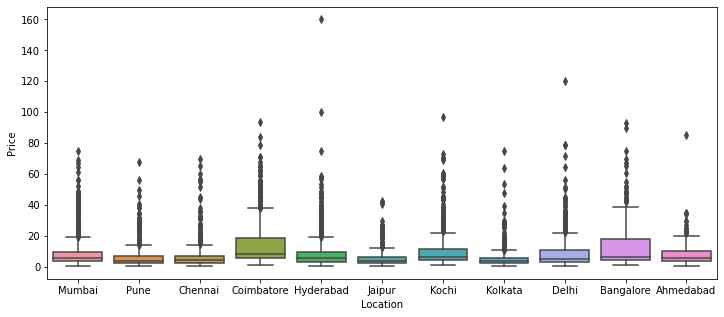

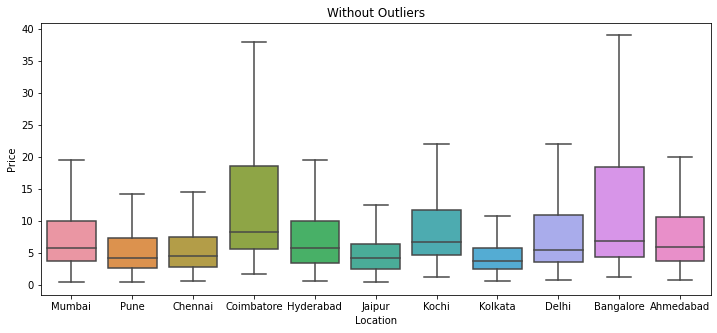

In [43]:
#Box Plot:Price vs Location
boxplot(data['Location'])

<b>Note: </b> Explore by plotting box-plots for target variable and the other categorical variables like Fuel_Type, transmission, Owner_type.

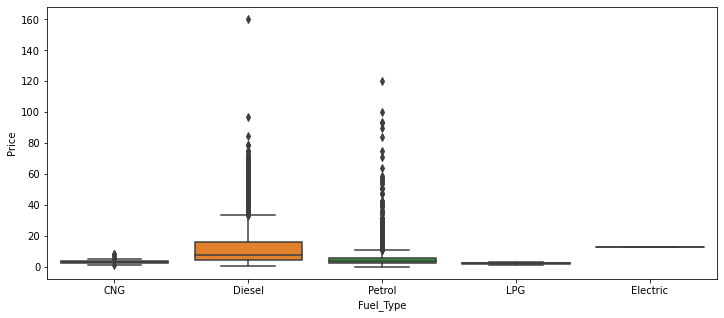

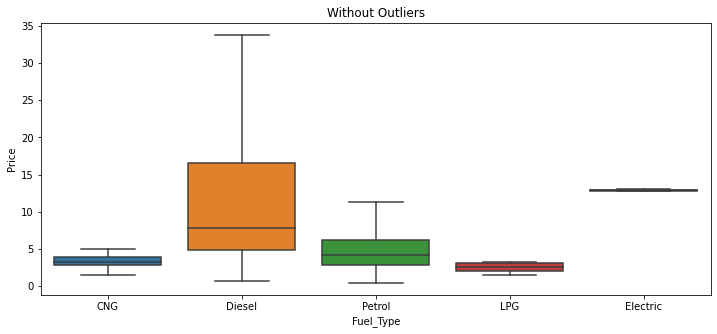

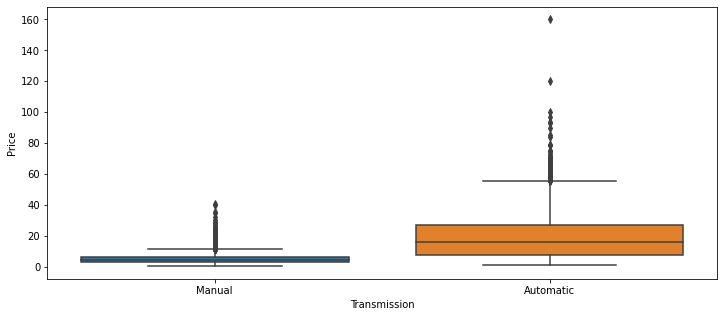

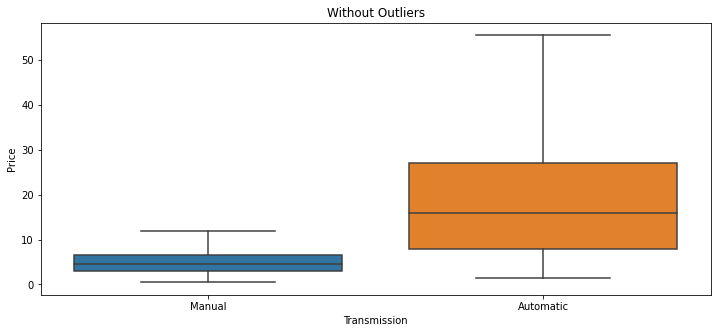

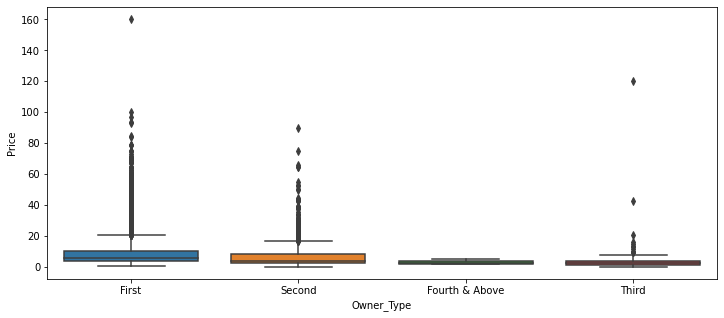

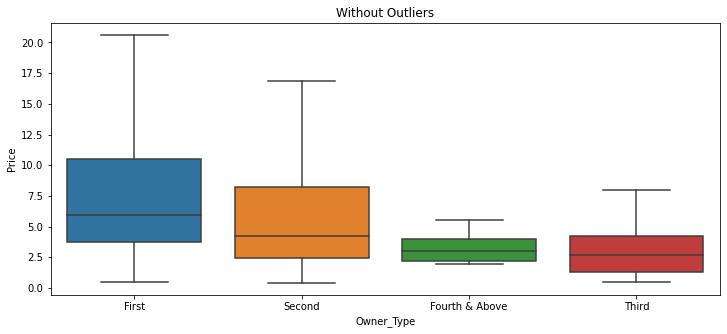

In [44]:
boxplot(data['Fuel_Type'])
boxplot(data['Transmission'])
boxplot(data['Owner_Type'])

**Observations and Insights for all plots**


### **Feature engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [45]:
# We should separate Brand Name from the Name
data['Brand'] = data['Name'].str.split(' ').str[0]
data['Model'] = data['Name'].str.split(' ').str[1] + data['Name'].str.split(' ').str[2]
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11.184421,0.559616,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10.621327,2.525729,Hyundai,Creta1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,10.736397,1.504077,Honda,JazzV
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11.373663,1.791759,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10.613246,2.875822,Audi,A4New


In [46]:
data.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [47]:
#from here, we can see some brands are either the same but written differently such as ISUZU and Isuzu which should be the same, 
#and some are not complete, such as mini cooper which shows mini or land rover which shows land
IncompleteCol=['ISUZU','Isuzu','Mini','Land']
#correcting brand names
data[data.Brand.isin(IncompleteCol)].sample(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand,Model
4801,Land Rover Freelander 2 SE,Hyderabad,2011,68000,Diesel,Automatic,First,12.39,2179.0,147.51,5.0,NaN,22.00,11.127263,3.091042,Land,RoverFreelander
1038,Land Rover Range Rover TDV8 (Diesel),Bangalore,2011,55000,Diesel,Automatic,First,10.20,4367.0,308.00,7.0,NaN,67.00,10.915088,4.204693,Land,RoverRange
1568,Land Rover Discovery Sport TD4 HSE 7S,Mumbai,2017,40000,Diesel,Automatic,First,12.81,1999.0,148.31,7.0,66.39,41.50,10.596635,3.725693,Land,RoverDiscovery
5067,Land Rover Discovery Sport SD4 HSE Luxury 7S,Coimbatore,2019,17201,Diesel,Automatic,First,12.51,2179.0,187.70,7.0,NaN,58.91,9.752723,4.076011,Land,RoverDiscovery
311,Land Rover Range Rover HSE Dynamic,Delhi,2017,44000,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,NaN,44.00,10.691945,3.784190,Land,RoverRange
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,NaN,2179.0,115.00,5.0,NaN,26.00,10.736397,3.258097,Land,RoverFreelander
3161,Mini Cooper 5 DOOR D,Kochi,2019,14857,Diesel,Automatic,First,20.70,1496.0,113.98,5.0,41.98,31.55,9.606226,3.451574,Mini,Cooper5
6482,Mini Cooper 3 DOOR D,Coimbatore,2017,26002,Diesel,Automatic,First,20.70,1496.0,113.98,4.0,36.50,NaN,10.165929,NaN,Mini,Cooper3
3752,Land Rover Range Rover Sport HSE,Kochi,2015,38467,Diesel,Automatic,First,12.65,2993.0,255.00,5.0,160.00,70.66,10.557556,4.257880,Land,RoverRange
5530,Land Rover Freelander 2 SE,Kochi,2014,59885,Diesel,Automatic,First,12.39,2179.0,147.51,5.0,NaN,20.11,11.000181,3.001217,Land,RoverFreelander


In [48]:
#Here we will change those brand names:
data.loc[data.Brand == 'ISUZU','Brand']='Isuzu'
data.loc[data.Brand=='Mini','Brand']='Mini Cooper'
data.loc[data.Brand=='Land','Brand']='Land Rover'
data.Brand.nunique()

32

In [49]:
data.groupby(data.Brand).size().sort_values(ascending =False)

Brand
Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               311
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land Rover         67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini Cooper        31
Volvo              28
Jeep               19
Porsche            19
Datsun             17
Isuzu               5
Force               3
Bentley             2
Lamborghini         1
OpelCorsa           1
Hindustan           1
Smart               1
Ambassador          1
dtype: int64

In [50]:
data.Model.isnull().sum()

1

In [51]:
#There is one car in the dataset with null value in the Model which we will have to drop it:
data.dropna(subset=['Model'],axis=0,inplace=True)
data.Model.nunique()

726

In [52]:
data.groupby('Model')['Model'].size().nlargest(10)

Model
SwiftDzire    189
Grandi10      179
WagonR        178
Innova2.5     145
Verna1.6      127
City1.5       122
Cityi         115
Creta1.6      110
NewC-Class    110
3Series       109
Name: Model, dtype: int64

#### **Observations and Insights: _____**
- The brand and Model (Or brand and Model) which was taken from Name is now can be used for both prediction of sales and also treat some null values as well based on the brand.
- There are 32 unique Brands. Maruti brand is the highest number in our dataset followed by Hyundai.
- There are 726 unique models and Swift Dzire is highest number.

### **Missing value treatment**

In [53]:
# Now check the missing values of each column. Hint: Use isnull() method
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                    83
Engine                     46
Power                     175
Seats                      53
New_price                6245
Price                    1233
kilometers_driven_log       0
price_log                1233
Brand                       0
Model                       0
dtype: int64

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7251 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7251 non-null   object 
 1   Location               7251 non-null   object 
 2   Year                   7251 non-null   int64  
 3   Kilometers_Driven      7251 non-null   int64  
 4   Fuel_Type              7251 non-null   object 
 5   Transmission           7251 non-null   object 
 6   Owner_Type             7251 non-null   object 
 7   Mileage                7168 non-null   float64
 8   Engine                 7205 non-null   float64
 9   Power                  7076 non-null   float64
 10  Seats                  7198 non-null   float64
 11  New_price              1006 non-null   float64
 12  Price                  6018 non-null   float64
 13  kilometers_driven_log  7251 non-null   float64
 14  price_log              6018 non-null   float64
 15  Bran

In [55]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log
count,7251.000000,7251.000000,7168.000000,7205.000000,7076.000000,7198.000000,1006.000000,6018.000000,7251.000000,6018.000000
mean,2013.366018,57811.930079,18.347437,1616.414018,112.748189,5.280495,22.779692,9.470243,10.760290,1.824705
std,3.253106,37502.011153,4.158107,595.140802,53.472430,0.809376,27.759344,11.165926,0.714085,0.873606
min,1996.000000,171.000000,6.400000,72.000000,34.200000,2.000000,3.910000,0.440000,5.141664,-0.820981
25%,2011.000000,34000.000000,15.300000,1198.000000,75.000000,5.000000,7.885000,3.500000,10.434116,1.252763
50%,2014.000000,53416.000000,18.200000,1493.000000,94.000000,5.000000,11.570000,5.640000,10.885866,1.729884
75%,2016.000000,73000.000000,21.100000,1968.000000,138.100000,5.000000,26.042500,9.950000,11.198215,2.297573
max,2019.000000,775000.000000,33.540000,5998.000000,616.000000,10.000000,375.000000,160.000000,13.560618,5.075174


#### **Observations and Insights: _____**
- There are no missing value in location, year, km driven (therefore kn driven log), fuel type, transmission, and owner type.
- There are 46 missing value  in engine, 175 in power, 53 in Seats, 6246 in New_Price, and 1234 in Price (therefore same in log price)
- Later on we should decide on how to treat these missing values.
- Price of 160K is too much for a car, probably this is an outlier.

In [56]:
#We can check to see how many missing values per row are there for each variable
num_missing = data.isnull().sum(axis=1)
num_missing.value_counts()

1    5029
3    1045
0     819
2     283
4      48
5      17
6       9
7       1
dtype: int64

In [57]:
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print("*" *30,f'\nFor the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = data[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')

****************************** 
For the rows with exactly 1 missing values, NAs are found in:
Mileage         5
New_price    5024
dtype: int64



****************************** 
For the rows with exactly 2 missing values, NAs are found in:
Mileage       25
Power         75
Seats          1
New_price    101
Price        182
price_log    182
dtype: int64



****************************** 
For the rows with exactly 3 missing values, NAs are found in:
Mileage        29
Power          32
Seats           5
New_price    1045
Price        1012
price_log    1012
dtype: int64



****************************** 
For the rows with exactly 4 missing values, NAs are found in:
Mileage       6
Engine       25
Power        42
Seats        25
New_price    48
Price        23
price_log    23
dtype: int64



****************************** 
For the rows with exactly 5 missing values, NAs are found in:
Mileage      17
Engine       11
Power        16
Seats        12
New_price    17
Price         6
price_log   

In [58]:
#We start with the highest missing value to figure out what to do:
data[num_missing==7]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand,Model
6633,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN,NaN,10.203592,NaN,Mahindra,TUV300


**Missing values in Seats**

In [59]:
# Checking missing values in the column 'Seats'
#data.isnull().Seats
data['Seats'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7248    False
7249    False
7250    False
7251    False
7252    False
Name: Seats, Length: 7251, dtype: bool

**Think about it:** Can we somehow use the extracted information from 'Name' column to impute missing values?

In [60]:
#We already had separated Name into Brand and Model.

**Hint:** Impute these missing values one by one, by taking median number of seats for the particular car, using the Brand and Model name


In [61]:
# Impute missing values in Seats,you can use fillna method in pandas
null_Seats = pd.isnull(data["Seats"])
data[null_Seats]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand,Model
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,NaN,NaN,NaN,NaN,NaN,2.95,11.002200,1.081805,Honda,City1.5
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,2.11,10.645449,0.746688,Maruti,Swift1.3
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,NaN,1498.0,99.0,NaN,NaN,3.60,11.162460,1.280934,Ford,FigoDiesel
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,NaN,1.75,11.490680,0.559616,Maruti,Swift1.3
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,NaN,NaN,NaN,NaN,NaN,26.50,10.915107,3.277145,Land Rover,RoverRange
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,NaN,3.20,10.915179,1.163151,Honda,City1.3
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,5.80,10.825661,1.757858,Maruti,Swift1.3
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,NaN,NaN,NaN,NaN,NaN,1.50,11.652687,0.405465,Honda,City1.5
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,NaN,NaN,NaN,NaN,NaN,40.88,11.142992,3.710641,Land Rover,RoverRange
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.00,1493.0,100.0,NaN,NaN,1.70,11.385092,0.530628,Honda,City1.5


In [62]:
#Now we will be using the combination of Brand and Model and use median of that number to fill in the missing values for Seats

data['Seats'] = data['Seats'].fillna(data.groupby('Name')['Seats'].transform('median'))

In [63]:
data['Seats'].isnull().sum()

46

In [64]:
#Now we can group and fill null value based on the model of the car
data['Seats'] = data['Seats'].fillna(data.groupby('Model')['Seats'].transform('median'))

In [65]:
data['Seats'].isnull().sum()

22

In [66]:
#There are 22 left and most of the cars are 5 seaters. Therefore, we fill in the rest of them with 5
data['Seats'] = data['Seats'].fillna(data.groupby('Brand')['Seats'].transform('median'))

In [67]:
# Now that we only have three null values, we can use the median based on the brand only.
null_Seats = pd.isnull(data["Seats"])
data[null_Seats]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand,Model


**Missing values for Mileage**

In [68]:
# Now check missing values of each column. Hint: Use isnull() method
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                    83
Engine                     46
Power                     175
Seats                       0
New_price                6245
Price                    1233
kilometers_driven_log       0
price_log                1233
Brand                       0
Model                       0
dtype: int64

In [69]:
# Impute missing Mileage. For example use can use median or any other methods.
data['Mileage'] = data['Mileage'].fillna(data.groupby('Name')['Mileage'].transform('median'))
data['Mileage'] = data['Mileage'].fillna(data.groupby(['Brand','Model'])['Mileage'].transform('median'))
data['Mileage'].isnull().sum()

32

In [70]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                    32
Engine                     46
Power                     175
Seats                       0
New_price                6245
Price                    1233
kilometers_driven_log       0
price_log                1233
Brand                       0
Model                       0
dtype: int64

**Missing values for Engine**

In [71]:
# For Engine, we can use Brand and Mdodel first
data['Engine'] = data['Engine'].fillna(data.groupby('Name')['Engine'].transform('median'))
data['Engine'] = data['Engine'].fillna(data.groupby(['Brand','Model'])['Engine'].transform('median'))
data['Engine'].isnull().sum()

18

In [72]:
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                    32
Engine                     18
Power                     175
Seats                       0
New_price                6245
Price                    1233
kilometers_driven_log       0
price_log                1233
Brand                       0
Model                       0
dtype: int64

**Missing values for Power**

In [73]:
# For Power also,, we can use Brand and Mdodel first
data['Power'] = data['Power'].fillna(data.groupby('Name')['Power'].transform('median'))
data['Power'] = data['Power'].fillna(data.groupby(['Brand','Model'])['Power'].transform('median'))
data['Power'].isnull().sum()

63

In [74]:
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                    32
Engine                     18
Power                      63
Seats                       0
New_price                6245
Price                    1233
kilometers_driven_log       0
price_log                1233
Brand                       0
Model                       0
dtype: int64

**Missing values for New_price**

In [75]:
data.New_price.isnull().sum()

6245

In [76]:
#First we will use the Name and remove some of the missing data:
data['New_price'] = data['New_price'].fillna(data.groupby('Name')['New_price'].transform('median'))
data.New_price.isnull().sum()

6018

In [77]:
data['New_price'] = data['New_price'].fillna(data.groupby(['Brand','Model'])['New_price'].transform('median'))
data.New_price.isnull().sum()

4577

In [78]:
#Just based on the brand now:
data['New_price'] = data['New_price'].fillna(data.groupby('Brand')['New_price'].transform('median'))
data.New_price.isnull().sum()

158

In [79]:
#Now that we have filled in the values as much as possible, we will see how many is left:
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                    32
Engine                     18
Power                      63
Seats                       0
New_price                 158
Price                    1233
kilometers_driven_log       0
price_log                1233
Brand                       0
Model                       0
dtype: int64

In [80]:
#Now we can fill in the Engine, Power, and Mileage with their median values for the missing data
data['Mileage'] = data['Mileage'].fillna(data['Mileage'].median())
data['Power'] = data['Power'].fillna(data['Power'].median())
data['Engine'] = data['Engine'].fillna(data['Engine'].median())

In [81]:
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                 158
Price                    1233
kilometers_driven_log       0
price_log                1233
Brand                       0
Model                       0
dtype: int64

In [82]:
#Now we will drop the remaining null values, whatever is left:


data = data.dropna(subset=['New_price'])
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                   0
Price                    1202
kilometers_driven_log       0
price_log                1202
Brand                       0
Model                       0
dtype: int64

In [83]:
data = data.dropna(subset=['Price'])
data.isnull().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
New_price                0
Price                    0
kilometers_driven_log    0
price_log                0
Brand                    0
Model                    0
dtype: int64

#### **Observations for missing values after imputing: _____**

- Some missing values were dropped, some were taken from median values based on other features such as Brand and Model of the car, or Engine and Power, or a combination of all.

In [84]:
data.shape

(5891, 17)

## **Proposed approach**

- **Potential techniques -** What different techniques should be explored?
- **Overall solution design -** What is the potential solution design?
- **Measures of success -** What are the key measures of success?

# **Milestone 2**

In [85]:
# Import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

## **Model Building**

1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like - Name 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split Data**

<li>Step1: Split the data into X and Y . 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

<b>Think about it:</b> Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

In [86]:
# Step-1
cars_data = data
X = cars_data.drop(['Name','Price','price_log','Kilometers_Driven'],axis=1)
y = cars_data[["price_log", "Price"]]
X.head()

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,kilometers_driven_log,Brand,Model
0,Mumbai,2010,CNG,Manual,First,26.60,998.0,58.16,5.0,5.440,11.184421,Maruti,WagonR
1,Pune,2015,Diesel,Manual,First,19.67,1582.0,126.20,5.0,16.060,10.621327,Hyundai,Creta1.6
2,Chennai,2011,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.610,10.736397,Honda,JazzV
3,Chennai,2012,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.215,11.373663,Maruti,ErtigaVDI
4,Coimbatore,2013,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,53.140,10.613246,Audi,A4New


In [87]:
y.head()

,price_log,Price
0,0.559616,1.75
1,2.525729,12.50
2,1.504077,4.50
3,1.791759,6.00
4,2.875822,17.74


In [88]:
# Step-2 Use pd.get_dummies(drop_first=True)
X = pd.get_dummies(X,drop_first=True)

In [89]:
# Step-3 Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(4123, 711) (1768, 711)


In [90]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (4123, 711)
X_test: (1768, 711)
y_train: (4123, 2)
y_test: (1768, 2)


In [91]:
# Let us write a function for calculating r2_score and RMSE on train and test data.
# This function takes model as an input on which we have trained particular algorithm.
#the categorical column as the input and returns the boxplots and histograms for the variable.

def get_model_score(model, flag=True):
    '''
    model : regressor to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_train_ = np.exp(pred_train)
    pred_test = model.predict(X_test)
    pred_test_ = np.exp(pred_test)
    
    train_r2=metrics.r2_score(y_train['Price'],pred_train_)
    test_r2=metrics.r2_score(y_test['Price'],pred_test_)
    train_rmse=metrics.mean_squared_error(y_train['Price'],pred_train_,squared=False)
    test_rmse=metrics.mean_squared_error(y_test['Price'],pred_test_,squared=False)
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-sqaure on training set : ",metrics.r2_score(y_train['Price'],pred_train_))
        print("R-square on test set : ",metrics.r2_score(y_test['Price'],pred_test_))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train['Price'],pred_train_)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test['Price'],pred_test_)))
    
    # returning the list with train and test scores
    return score_list

<hr>

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

### **Fitting a linear model**

Linear Regression can be implemented using: <br>

**1) Sklearn:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
**2) Statsmodels:** https://www.statsmodels.org/stable/regression.html

In [92]:
# import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

In [93]:
lr = LinearRegression()
lr.fit(X_train, y_train['price_log'])
#get_model_score(lr)

LinearRegression()

In [94]:
get_model_score(lr)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').